**Linear Regression**

- Linear Regression is a simple approach to supervised learning. It assumes that the dependance of the response(endogenous) variable $Y$ on $X_1,X_2,...X_p$ is linear.
- True Regression functions are never linear.
- Although it may seem overly simplistic, linear regression is extremely useful both conceptually and practically.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

from matplotlib import style
style.use('fivethirtyeight')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data = pd.read_csv('/content/drive/My Drive/Repos/Git/Machine-Learning/An Introduction to Statistical Learning/Dataset/Advertising.csv')

In [3]:
data.head(3)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3


In [4]:
data.drop('Unnamed: 0',1,inplace=True)
data.head(3)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3


**Linear Regression for Advertising Data**

Questions we might ask:
- Is there a relationship between advertising budget and sales?
- How strong is the relationship between advertising budget and sales?
- Which media conntributes to the sales?
- How accurate can we predict future sales?
- Is the relationship linear?
- Is there a synergy among the advertising data?

**Simple Linear Regression using a Single Predictor X.**
- We assume a model ,

  $Y = \beta _0+\beta _1X+\epsilon,$

  where $\beta_0$ and $\beta_1$ are two unknown constants that represent the *intercept* and the *slope*, also know as the *coeefficients* or *parameters* and $\epsilon$ is the error term

- Given some estimates of $\hat \beta_0$ and $\hat\beta_1$ for the model coefficients, we predict the future sales using,

  $\hat y = \hat\beta_0+\hat\beta_1x$

  where $\hat y$ indicates a prediction of $Y$ on the basis of $X = x$.
  The hat symbol ($\hat y$) denotes an estimated value.

In [5]:
from statsmodels.formula.api import ols

In [6]:
# TV Model
model_tv = ols('Sales ~ TV',data=data).fit()

# TV Model
model_radio = ols('Sales ~ Radio',data=data).fit()

# TV Model
model_np = ols('Sales ~ Newspaper',data=data).fit()

[]

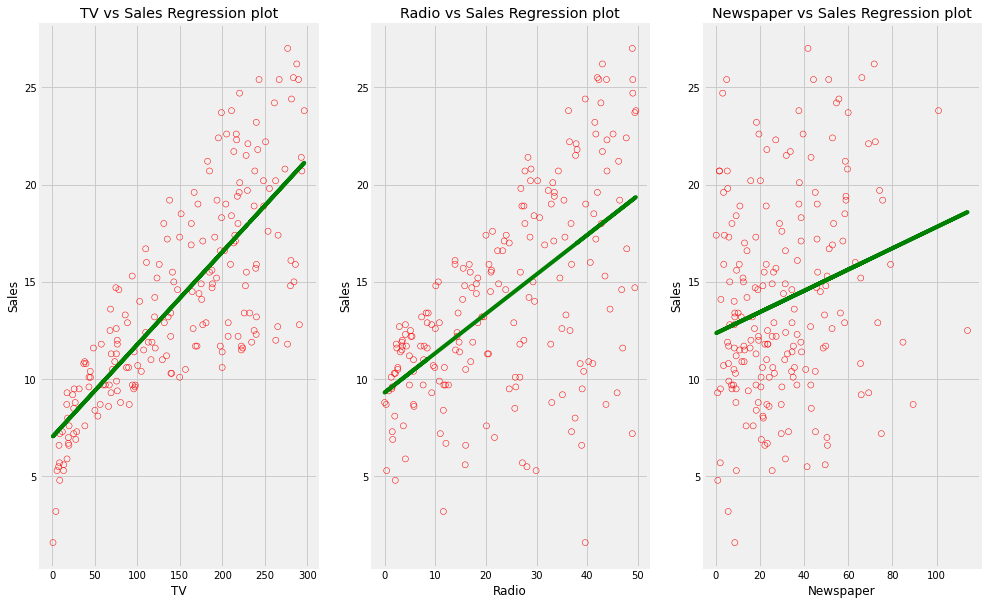

In [7]:
fig, ax = plt.subplots(1,3,figsize=(15,10))

# TV vs Sales
ax[0].scatter(data['TV'],data['Sales'],facecolors='None',edgecolor='r')
ax[0].plot(data['TV'],model_tv.fittedvalues,'g')
ax[0].set_title('TV vs Sales Regression plot')
ax[0].set_xlabel('TV')
ax[0].set_ylabel('Sales')

# Radio vs Sales
ax[1].scatter(data['Radio'],data['Sales'],facecolors='None',edgecolor='r')
ax[1].plot(data['Radio'],model_radio.fittedvalues,c='g')
ax[1].set_title('Radio vs Sales Regression plot')
ax[1].set_xlabel('Radio')
ax[1].set_ylabel('Sales')

# Newspaper vs Sales
ax[2].scatter(data['Newspaper'],data['Sales'],facecolors='None',edgecolor='r')
ax[2].plot(data['Newspaper'],model_np.fittedvalues,c='g')
ax[2].set_title('Newspaper vs Sales Regression plot')
ax[2].set_xlabel('Newspaper')
ax[2].set_ylabel('Sales')

plt.plot()

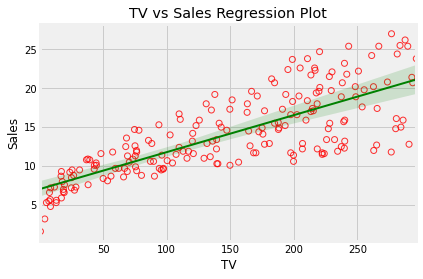

In [8]:
sns.regplot(data['TV'],data['Sales'],color='g',scatter_kws={'facecolor':'None','edgecolor':'r'},order=1,ci=100,line_kws={'lw':2})
plt.title('TV vs Sales Regression Plot')
plt.show()

**Estimation of parameters by Least Squares.**
- Let $\hat y_i = \hat\beta_0+\hat\beta_1x_i$ be the prediction for $Y$ based on the $i$th value of $X$. Then $e_i = y_i-\hat y_i$ represents the $i$th *residual*. 
- We define the *residual sum of squares*(**RSS**) as

  **RSS** = $e_1^2+e_2^2+...+e_n^2$,

  or equivalently as,

  **RSS** = $(y_1 - \hat y_1)^2+(y_2 - \hat y_2)^2+...+(y_n - \hat y_n)^2$

- The Least Squares approach chooses $\hat\beta_0$ and $\hat\beta_1$ to minimize the RSS. The minimizing values can be shown to be

  $\hat\beta_1 = \frac {\sum_{i=1}^n(x_i-\bar x)(y_i-\bar y)}{\sum_{i=1}^n(x_i - \bar x)^2}$

  $\hat\beta_0 = \bar y - \hat\beta_1\bar x$,

  where $\bar y = \frac{1}{n}\sum_{i=1}^n y_i$ and $\bar x = \frac{1}{n}\sum_{i=1}^n x_i$ are the sample means.

**Assessing the Accuracy of the Coefficients Estimates**
- The standard error of an Estimator reflects how it varies under repeated sampling. We have,

  $SE(\hat\beta_1)^2 = \frac {\sigma^2}{\sum_{i=1}^n(x_i-\bar x)^2}$,

  $SE(\hat\beta_0)^2 = \sigma^2[\frac{1}{n}+\frac{\bar x^2}{\sum_{i=1}^n(x_i-\bar x)^2}]$,

  where $\sigma^2 = Var(\epsilon)$

- These Standard Error can be used to compute confidence intervals. A $95$% confidence interval is defined as the range of values such that with $95$% probability the range will contain the true unknown value of the parameter. It has the form

  $\hat\beta_1\pm2.SE(\hat\beta_1)$

- That is, there is approximately a $95$% chance that the interval 

  $[\hat\beta_1-2.SE(\hat\beta_1),\hat\beta_1+2.SE(\hat\beta_1)]$,

  will contain the true value of $\beta_1$.

**Hypothesis Testing on Coefficients**
- Standard Errors  can also be used to perform hypothesis testing on the coefficients. The most common hypothesis test involves testing the null hypothesis of,
  - $H_0:$ There is no relationship between $X$ and $Y$.
  - $H_A:$ There is some relationship between $X$ and $Y$.

- Mathematically, this corresponds to testing,
  
  $H_0:\beta_1=0$

  $H_A:\beta_1\ne0$

  since, if $\beta_1=0$, then the model reduces to $Y = \beta_0+\epsilon$ and $X$ is not associated with $Y$.

- To Test the null hypothesis, we compute the t-statistic, given by ,

  $t = \frac{\beta_1 - 0}{SE(\hat\beta_1)}$,
- This will have a t-distribution with $n-2$ degrees of freedom, assuming, $\beta_1=0$.
- Using statistical Software, it is easy to compute the probability of observing any value equal to $\left|t\right|$ or larger. We call this the probability, the $p-value$.

**Example**

In [9]:
print(model_tv.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sun, 21 Jun 2020   Prob (F-statistic):           1.47e-42
Time:                        04:15:31   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.0

**Observation:**
- $\hat\beta_1 = 0.0475$
- $SE(\hat\beta_1) = 0.003$
- $\frac{\hat\beta_1}{SE(\hat\beta_1)} = 17.668$, which is the $t-statistic$ value.
- $p-value$ is almost equal to zero, which means that TV is a significant variable.

**Assessing the Overall Accuracy of the Model**

- We compute the Residual Standard Error,

  $RSE = \sqrt{\frac{1}{n-2}RSS} = \sqrt{\frac{1}{n-2}\sum_{i=1}^n(y_i -\hat y_i)^2}$,
  
  where, the residual sum of squares is the $RSS = \sum_{i=1}^n(y_i -\hat y_i)^2 $.

- $R^2$ measures how much of the variability of the data is captured by ***linear*** model.

- $R^2 = 1-\frac{RSS}{TSS}$, where ,

  $TSS = \sum(\bar y - y_i)^2$

  $RSS = \sum(\hat y - y_i)^2$

- $TSS$ means the Total Sum of Square errors from the mean.

- It can be shown that in this simple linear regression setting that $R^2 = r^2$, where r is the correlation between $X$ and $Y$:

  $r = \frac{\sum_{i=1}^n(x_i-\bar x)(y_i-\bar y)}{\sqrt{\sum_{i=1}^n(x_i - \bar x)^2}\sqrt{\sum_{i=1}^n(y_i - \bar y)^2}}$.

- $R^2$ is also known as Coefficient of Determination.

In [10]:
print(model_tv.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sun, 21 Jun 2020   Prob (F-statistic):           1.47e-42
Time:                        04:15:31   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.0

**Observations:**
- $R^2$: 0.612
- F-statistic: 312.1

**Multiple Linear Regression**

- Here our model is,

  $Y = \beta_0+\beta_1X_1+\beta_2X_2+...+\beta_pX_p+\epsilon$

- We interpret $\beta_j$ as the average on $Y$  of a one unit increase in $X_j$, holding all the predictors fixed. In advertising example, our model becomes,

  sales $ = \beta_0+\beta_1\times$TV+$\beta_2\times$Radio+$\beta_3\times$Newspaper+$\epsilon$

**Interpretting regression coefficients**
- The Ideal Scenario is when the predictors are uncorrelated - a balanced design:
  - Each coefficient can be  estimated and tested seperatly.
  - Interpretations such as ***a unit change in $X_j$ is associated with a $\beta_j$ change in $Y$, while all other variables stay fixed***, are possible.

- Correlation among predictors cause problems:
  - The variance of all coefficients  tends to increase, sometimes dramatically.
  - Interpretation becomes hazardous -  when $X_j$ changes everything else changes as well.

- ***Claims of Causality*** should be avoided for observational data.

**The Woes of interpreting regression coefficients**

- a regression coefficient $\beta_j$ estimates the expected change in $Y$ per unit change in $X_j$, with all other predictors held fixed. But predictors usually change together!

**Estimation and Prediction for Multiple Regression**

- Given estimates of $\hat\beta_0,\hat\beta_1,...,\hat\beta_p$, we can make predictions using the formula,

  $\hat y = \hat\beta_0+\hat\beta_1x_1+\hat\beta_2x_2+...+\hat\beta_px_p$.

- We estimate the $\beta_0,\beta_1,...,\beta_p$ as the values that minimize the sum of squared residuals.

  $RSS = \sum_{i=1}^n(y_i - \hat y_i)^2$

  The values $\hat\beta_0,\hat\beta_1,...,\hat\beta_p$ that minimizes the RSS are the Multiple Least Square Regression Coeffiecients estimates.

In [11]:
model = ols('Sales ~ TV+Radio+Newspaper',data).fit()

In [12]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sun, 21 Jun 2020   Prob (F-statistic):           1.58e-96
Time:                        04:15:31   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.0

**Observation**
- The $p-value$ of the TV and Radio are highly significant.
- The $p-value$ of newspaper is not significant.

**Correlation Matrix**

In [13]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


**Observation**
- The radio and newspaper are highly correlated. This is very dangerous and may screw our results.

**Some Important Question:**
- Is atleast one of the predictors useful in predicting the response?
- Do all the predictors  help explain $Y$, or is only a subset of the predictors is useful?
- How well does the model fit the data?
- How much predictability does our model has?


**Is atleast one predictor useful?**


- For this question we can use the $F-statistic$,

  $F = \frac{\frac{(TSS-RSS)}{p}}{\frac{RSS}{n-p-1}}$

- We would want the $F-Statistic$ value to be high and the $p-value$ of the F-statistic should be very low less than the $\alpha$ or 0.05

**Deciding on Important Variables**

- The most direct approach is called **all subsets** or **best subset** regression. We compute the least square fit for all subsets and then choose between them based on some criterion that balances the training error with model size.
- We can't examine all the possible models, since there are $2^p$ of them.
- We will be using an automated approach thats most commonly used.

**Forward Selection(Feature Selection Techniques)**

- Begin with null model - a model that contains intercept but no predictors
- Fit p simple linear regressions and add to null model that variable that results in lower RSS.
- Add to that variable that results in the lowest RSS among all the two-variable models.
- Continue until some stopping rule is satisfied, for example, when all the remaining variables have a p-value above some threshold.

**Backward Selection(Feature Selection Techniques)**

- Start with all the variables in the model.
- Remove the variable with the largest p-value -- that is , the variable that is the least statistically significant.
- The new (p-1) variable model is fit, and the variable with the largest p-value is removed.
- Continue till the stopping rule is reached. For Instance,we may stop when all the remaining variables have a significant p-value definied by some significant threshold.

**Other Considerations in the Regression Model**

***Qualitative Predictors***

- Some predictors are not quantitative but are qualitative, taking a discrete set of values.
-  These are also called categorical  predictors or factor variables.

In [14]:
credit_data = pd.read_csv('/content/drive/My Drive/Repos/Git/Machine-Learning/An Introduction to Statistical Learning/Dataset/Credit.csv')

In [15]:
credit_data.drop('Unnamed: 0',1,inplace=True)

In [16]:
credit_data.head(3)

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580


**Observation:**
- Inaddition to the 7 quantitative variables shown, there are four qualitative variables: Gender, Student, Married, Ethinicity

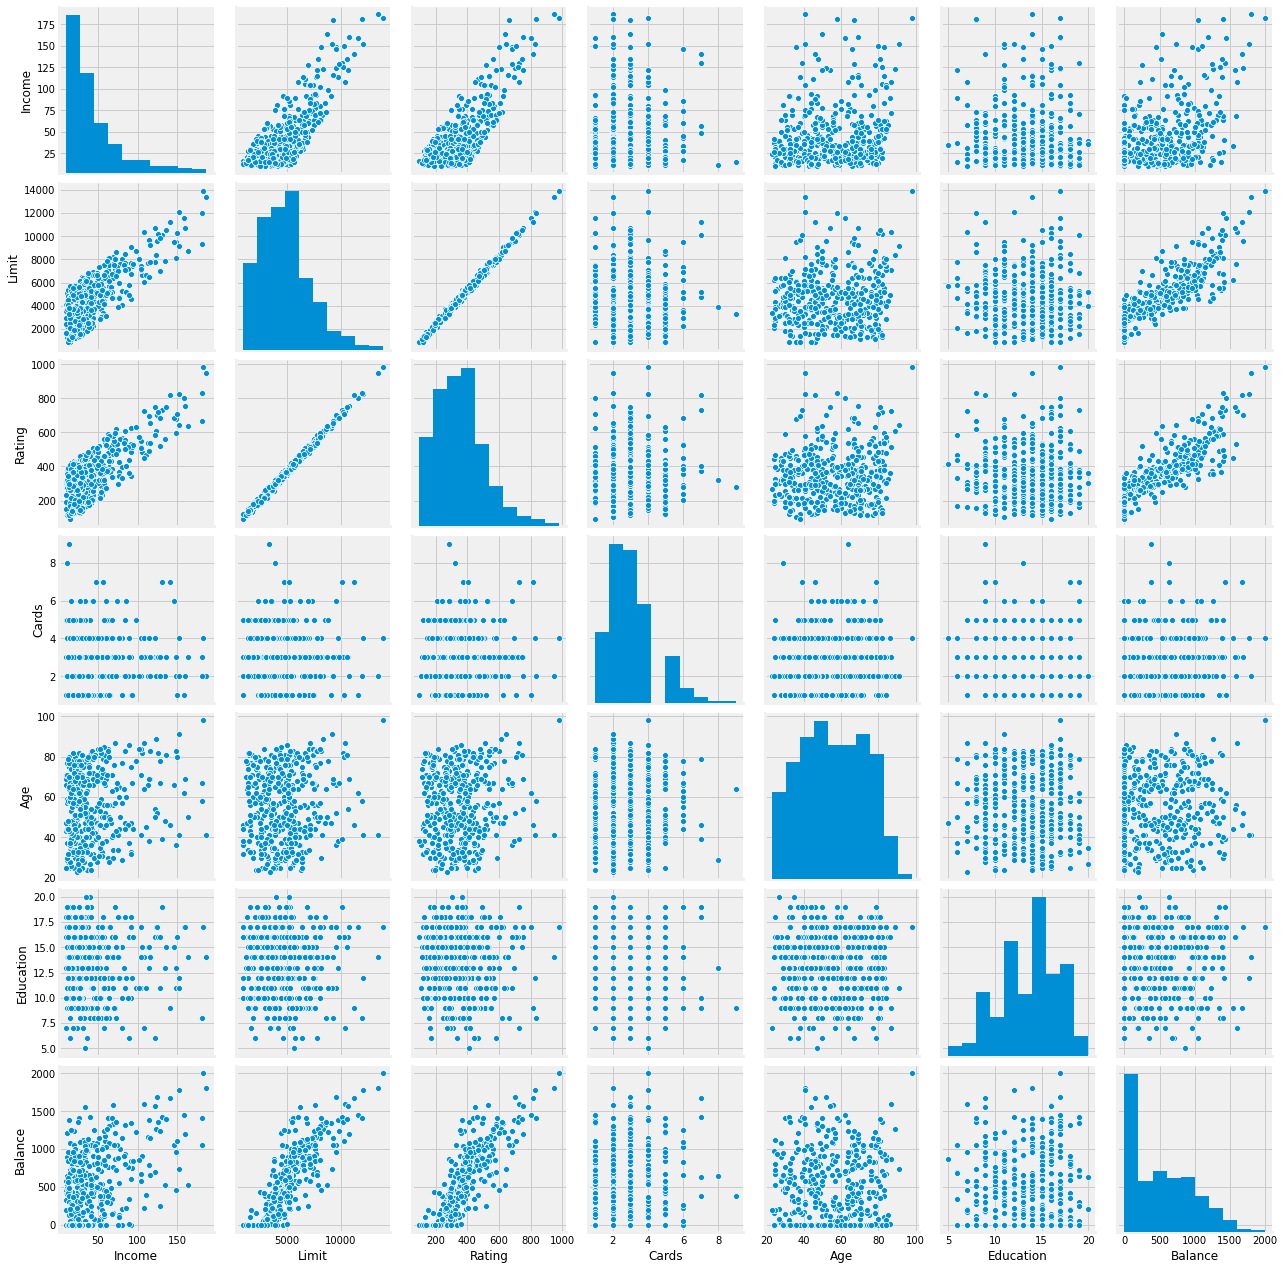

In [17]:
sns.pairplot(credit_data)
plt.show()

- Lets consider that the $Y = \beta_0+\beta_1X_1+\beta_2X_2+\epsilon$

- We want to capture the relationship between balance age and income and gender.
- This can be denoted by,

  $balance = \beta_0+\beta_1\times Age+\beta_2\times Income+\beta_3\times Gender$
- We want to capture the gender here. However we know that its a qualitative varaible and not a quantitative variable.

**How to use the qualitative variables in regression line**

- Inorder to use qualitative variables with the regression line along with qualitative variables,we can use dummy variables.


**Example:**

- Investigate the differences in credit card balance between males and females, ignoring other predictors. We create a new variable,

  $x_i = \begin{cases}
  1, &\text{if $i$th person is female}\\
  0, &\text{if $i$th person is male}
  \end{cases}$

- Resulting model:

  $y_i = \beta_0+\beta_1x_i+\epsilon = 
  \begin{cases}
  \beta_0+\beta_1+\epsilon_i, &\text{if $i$th person is female}\\
  \beta_0+\epsilon_i, &\text{if $i$th person is male}
  \end{cases}$

- In this way we can use qualitative variables in our quantitative lines.

- Lets take another example,

   $\text{balance} = \beta_0+\beta_1\times\text{Income}+\beta_2\times\text{Gender}$

   where,

   $ \text{Gender} = \begin{cases}
   1, &\text{Female}\\
   0, &\text{Male}
   \end{cases}$

- $\text{Balance}(\text{Income},\text{Male}) = \beta_0+\beta_1\times\text{Income}$
- $\text{Balance}(\text{Income},\text{Female}) = \beta_0+\beta_1\times\text{Income}+\beta_2$
- $\text{Balance}(\text{Female})-\text{Balance}(\text{Male}) = \beta_2 $

In [18]:
credit_data.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [19]:
new_credit_data = pd.concat([credit_data,pd.get_dummies(credit_data.Gender).drop(' Male',1)],axis=1).drop('Gender',1)
new_credit_data.rename(columns={' Female':'Female'},inplace=True)

In [20]:
model = ols('Balance ~ Female',new_credit_data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.1836
Date:                Sun, 21 Jun 2020   Prob (F-statistic):              0.669
Time:                        04:15:44   Log-Likelihood:                -3019.3
No. Observations:                 400   AIC:                             6043.
Df Residuals:                     398   BIC:                             6051.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    509.8031     33.128     15.389      0.0

**Observation:**
- The p-value is insignificant.

**Qualitative Predictors with more than two levels**

- With more than two levels, we create additional dummy variables.
- If we have $n$ categorical variables, then we must define $n-1$ dummy variables.

**Example:**

- For the ethinicity variable, we create two dummy variables. The first could be,

  $x_{i1} = \begin{cases}
  1, &\text{if $i$th person is Asian}\\
  0, &\text{if $i$th person is Not Asian}
  \end{cases}$

  and the second could be,

  $x_{i2} = \begin{cases}
  1, &\text{if $i$th person is Caucasian}\\
  0, &\text{if $i$th person is Not Caucasian}
  \end{cases}$

- Then both of these variables can be used in a regression equation, inorder to obtain the model

  $y_i = \beta_0+\beta_1x_{i1}+\beta_2x_{i2}+\epsilon = \begin{cases}
  \beta_0+\beta_1+\epsilon_i, &\text{if $i$th person is Asian}\\
  \beta_0+\beta_2+\epsilon_i, &\text{if $i$th person is Caucasian}\\
  \beta_0+\epsilon_i, &\text{if $i$th person is African American}
  \end{cases}$

- There will always be one fewer dummy variable than the number of levels. The level with no dummy variable -  African American in this example - is known as the baseline.

In [21]:
model = ols('Balance ~ Ethnicity',credit_data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                   0.04344
Date:                Sun, 21 Jun 2020   Prob (F-statistic):              0.957
Time:                        04:15:44   Log-Likelihood:                -3019.3
No. Observations:                 400   AIC:                             6045.
Df Residuals:                     397   BIC:                             6057.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                531

**Observation**
- The p-values are insignificant.

**Extensions of Linear Model**

Removing the additive assumptions: ***interactions*** and ***non-linearity***

**Interactions**
- In our previous analysis of Advertising data, we assumed that the effect of sales of increasing one advertising medium is independant of the amount spent on other media.
- For example,the linear model,

  $\hat{sales} = \beta_0+\beta_1\times\text{TV}+\beta_2\times\text{Radio}+\beta_3\times\text{Newspaper}$

  states that the average effect of sales of one unit increase in TV is always $\beta_1$,regardless the amount spent on radio
- But suppose that spending money on radio advertising actually increases the effectiveness of TV advertising, so that the slope of the TV should increase as the radio increases.
- In this situation, given the fixed budget of $100,000, spending half on radio and half on TV may increase the sales more than allocating the entire amount to Radio or TV.
- In Marketing, this is known as the synergy effect, and in statistics this is refered to as an interaction effect.

**Modelling Interactions- Advertising Data**

- Model takes the form

  $\text{sales} = \beta_0+\beta_1\times\text{TV}+\beta_2\times\text{Radio}+\beta_3\times\text{Radio}\times\text{TV}+\epsilon$

In [22]:
model = ols('Sales ~ TV+Radio+TV:Radio',data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1963.
Date:                Sun, 21 Jun 2020   Prob (F-statistic):          6.68e-146
Time:                        04:15:44   Log-Likelihood:                -270.14
No. Observations:                 200   AIC:                             548.3
Df Residuals:                     196   BIC:                             561.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.7502      0.248     27.233      0.0

**Observation:**
- The results in the table suggests that the interactions are important.
- The p-value for the interaction term $\text{Radio}\times\text{TV}$ is extremely low, indicating that there is a strong evidence for $H_A:\beta_3\ne0$.
- The $R^2$ for the interaction model is 96.8%, compared to the 89.7% for the model that predicts sales using TV and radio without an interaction term.
- This means that (96.8-89.7)/(100-89.7) = 69% of the variability in sales that remains after fitting the additive model has been explained by the interaction term.
- The coefficient in the table suggests that an increase in TV Advertising by $1000 is associated with increased sales of 

  $(\hat\beta_1+\hat\beta_3\times\text{Radio})\times1000 = 19+1.1\times\text{Radio units}$
- An increase in radio advertising of $1,000 will be associated with an increase in the sale of

  $(\hat\beta_2+\hat\beta_3\times\text{TV})\times1000 = 29+1.1\times\text{TV units}$

**Hierarchy**

- Sometimes it is the case that an interaction term has a very small p-value, but the associated main effects (in this case, TV and Radio) do not.
- *If we include the interaction in a model, we should also include the main effects, even if the p-values associated with their coeffiecients are not significant*
- The Rationale for this priciple is that interactions are hard. To interpret a model without its main effects - their meaning is changed.
- Specifically, the interaction term also contains the main effects, if the model has no main effect terms.

**Interaction between Qualitative and Quantitative Variables**

- Consider the credit dataset, and suppose that we wish to predict balance using income(quantitative) and student(qualitative)
- Without an interaction the model takes the form,

  $\text{balance}_i \approx \beta_0+\beta_1\times\text{income}_i+\begin{cases}
  \beta_2, &\text{if $i$th person is a Student}\\
  0, &\text{if $i$th person is not a Student}
  \end{cases}$

  $\text{balance}_i = \beta_1\times\text{income}+\begin{cases}
  \beta_0+\beta_2, &\text{if $i$th person is a student}\\
  \beta_0, &\text{if $i$th person is not a student}
  \end{cases}$
- With interaction it takes the form,

  $\text{balance}_i\approx \beta_0+\beta_1\times\text{income}_i+\begin{cases}
  \beta_2+\beta_3\times\text{income}_i, &\text{if Student}\\
  0, &\text{if not Student}
  \end{cases}$

  $\text{balance}_i = \begin{cases}
  (\beta_0+\beta_2)+(\beta_1+\beta_3)\times\text{income}_i, &\text{if Student}\\
  \beta_0+\beta_1\times\text{income}_i, &\text{if not Student}
  \end{cases}$

In [23]:
credit_data.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [24]:
model = ols(' Balance ~ Income+Student+Income:Student',credit_data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     51.30
Date:                Sun, 21 Jun 2020   Prob (F-statistic):           4.94e-28
Time:                        04:15:44   Log-Likelihood:                -2953.7
No. Observations:                 400   AIC:                             5915.
Df Residuals:                     396   BIC:                             5931.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               200.62

In [25]:
not_student = credit_data[credit_data['Student']=='No'][['Income','Student']]
student = credit_data[credit_data['Student']=='Yes'][['Income','Student']]

In [26]:
student_pred = model.predict(student)

In [27]:
not_student_pred = model.predict(not_student)

In [28]:
model_without_interaction = ols(' Balance ~ Income+Student',credit_data).fit()

In [29]:
mi_student_pred = model_without_interaction.predict(student)
mi_not_student_pred = model_without_interaction.predict(not_student)

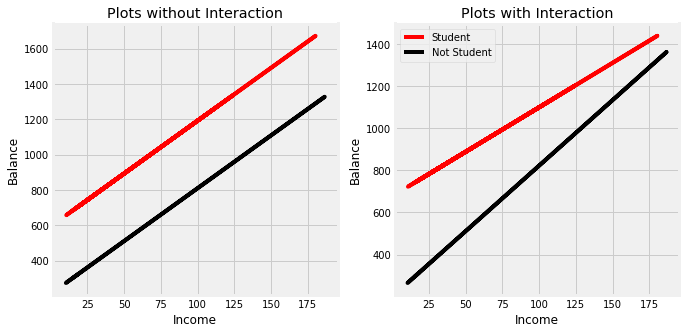

In [30]:
fig, ax = plt.subplots(1,2,figsize=(10,5))

#plots without Interaction
ax[0].plot(student.Income,mi_student_pred,c='r')
ax[0].plot(not_student.Income,mi_not_student_pred,c='black')
ax[0].set_xlabel('Income')
ax[0].set_ylabel('Balance')
ax[0].set_title('Plots without Interaction')

#plots with Interaction
ax[1].plot(student.Income,student_pred,c='r',label='Student')
ax[1].plot(not_student.Income,not_student_pred,c='black',label='Not Student')
ax[1].set_xlabel('Income')
ax[1].set_ylabel('Balance')
ax[1].legend(loc='best')
ax[1].set_title('Plots with Interaction')

plt.show()

**Non Linear Effects of Predictors**

In [31]:
auto_data = pd.read_csv('/content/drive/My Drive/Repos/Git/Machine-Learning/An Introduction to Statistical Learning/Dataset/Auto.csv')

In [32]:
auto_data.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite


In [33]:
auto_data.replace('?',np.nan,inplace=True)
auto_data.dropna(inplace=True)

In [34]:
auto_data.horsepower = auto_data.horsepower.astype(np.int64)

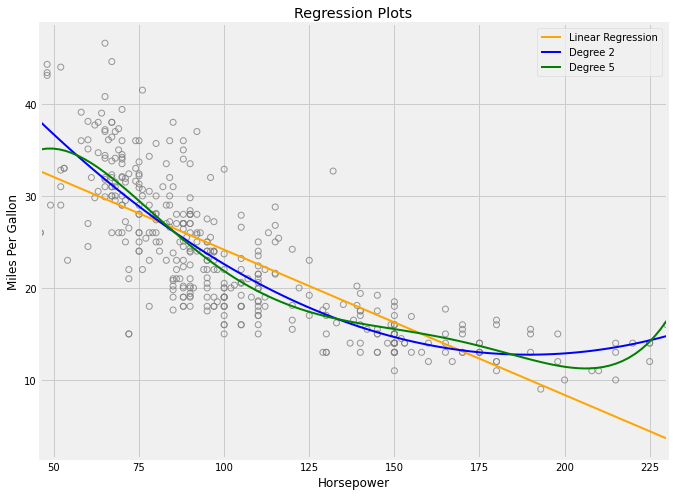

In [35]:
plt.figure(figsize=(10,8))
sns.regplot('horsepower','mpg',data=auto_data,scatter_kws={'facecolor':'None','edgecolor':'grey'},color='orange',line_kws={'label':'Linear Regression','lw':2},ci=None)
sns.regplot('horsepower','mpg',data=auto_data,scatter_kws={'facecolor':'None','edgecolor':'None'},color='blue',line_kws={'label':'Degree 2','lw':2},order=2,ci=None)
sns.regplot('horsepower','mpg',data=auto_data,scatter_kws={'facecolor':'None','edgecolor':'None'},color='green',line_kws={'label':'Degree 5','lw':2},order=5,ci=None)
plt.legend(loc='best')
plt.title('Regression Plots')
plt.xlabel('Horsepower')
plt.ylabel('Miles Per Gallon')
plt.show()

**Observation:**
- We can deduce that the ploynomial regression of degree 2 would be a better fit

- The figure suggests that ,

   $\text{mpg} = \beta_0+\beta_1\times\text{horsepower}+\beta_2\times\text{$\text{horsepower}^2$}+\epsilon$

   may provide a better fir.

In [36]:
auto_data['horsepower2'] = auto_data.horsepower**2

In [37]:
auto_model = ols('mpg ~ horsepower+I(horsepower**2)',auto_data).fit()
print(auto_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     428.0
Date:                Sun, 21 Jun 2020   Prob (F-statistic):           5.40e-99
Time:                        04:15:45   Log-Likelihood:                -1133.2
No. Observations:                 392   AIC:                             2272.
Df Residuals:                     389   BIC:                             2284.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             56.9001      1

**Potential Fitting Problems**

- Non Linearity of data.
- Dependance of Error Terms.
- Non Constant variance of Error terms.
- Outliers
- High Leverage points
- Collinearity.

**1.Non Linearity of Data:**
- The Linear Regression Model assumes that there is a straight line relationship between the predictors and response.
- If the True Relationship is far from linear, then all the conclusions that we draw from the fit are suspect.

**Note**
- Residual plots are useful in identifying the non-linearity.

In [38]:
auto_model_n = ols('mpg ~ horsepower',data=auto_data).fit()

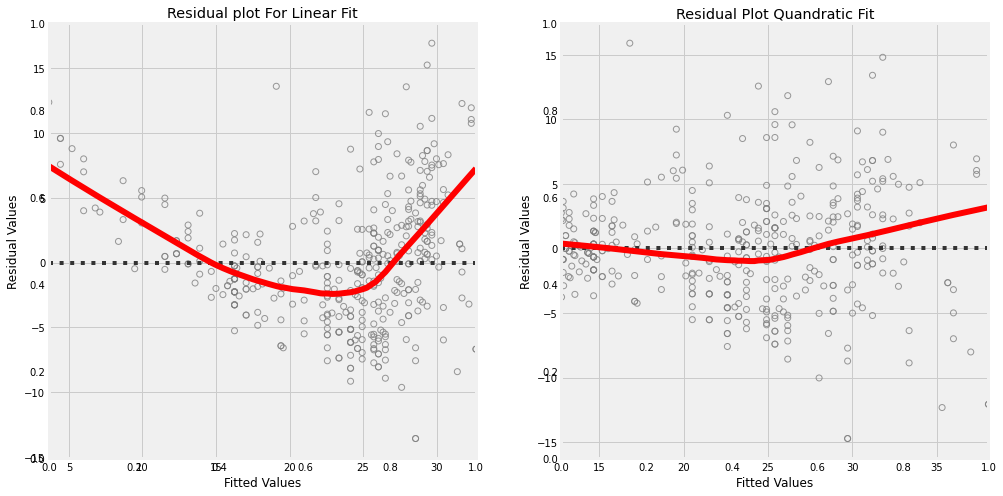

In [39]:
mpg_pred_inter = auto_model.predict(auto_data[['horsepower','horsepower2']])
mpg_pred_n = auto_model_n.predict(auto_data[['horsepower']])

fig, ax = plt.subplots(1,2,figsize=(15,8))

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

#Quadratic Plot
sns.residplot(x = mpg_pred_inter,y=auto_model.resid,line_kws={'color':'r'},scatter_kws={'facecolor':'None','edgecolor':'grey'},lowess=True,ax=ax2)
ax2.set_title('Residual Plot Quandratic Fit')
ax2.set_xlabel('Fitted Values')
ax2.set_ylabel('Residual Values')

#Linear Fit
sns.residplot(x = mpg_pred_n,y=auto_model_n.resid,line_kws={'color':'r'},lowess=True,ax=ax1,scatter_kws={'facecolor':'None','edgecolor':'grey'})
ax1.set_title('Residual plot For Linear Fit')
ax1.set_xlabel('Fitted Values')
ax1.set_ylabel('Residual Values')
plt.show()

**Observations and Indentification:**

- Ideally, the residual plot will show no discernible pattern.
- The presence of a pattern may indicate a problem with some aspect of the linear model.
- The plot in the left shows the residual plot from the linear regression between mpg and horsepower on the Auto dataset.
- The red line is a smooth fit to the residual, which is displayed inorder to make it easier to identify any trends.
- The residuals exhibit a clear U-shape which exhibits the non-linearity of the data.
- In contrast,the plot on the right side,which contains a quadratic term, there appears to be litter pattern in residuals, suggesting that the quadratic is a better fit to the data.

**Solutions:**
- If the residual plots indicate a non linear association or patterns, then a simple approach is to use non linear transformations of the predictors such as $\log X,\sqrt X \text{ and } X^2$, in the regression model.

**2.Correlation of Error Terms:**

- An important assumption of the linear regression model is that the error terms, $\epsilon_1,\epsilon_2,...,\epsilon_n$ are uncorrelated.
- if the errors are uncorrelated, then the fact is $\epsilon_i$ is positive provides little to no information about the sign of $\epsilon_{i+1}$.
- The standard errors that are computed for estimated computed regression coefficients or fitted values based on assumptions of uncorrelated error terms.
- If there is correlation between the error terms, then the estimated standard error will underestimate the True standard error.
- This would result in confidence interval and prediction intervals to be narrower than they actually should be.
- p-values associated with the model will be lower than they should.This could cause an error in significance of the predictor or the entire model.
- This kind of correlation is common in *time-series* data,which consists of observation for which measurement are obtained at discrete points in time.
- Inorder to determine, if this is the case for a given dataset,we can plot the residuals from our model as a function of time.
- If errors are uncorrelated, then there should be no discernible pattern.
- If the errors are correlated, then there should be a tracking pattern, i.e, the adjacent residuals may have similar values.

**Note:** In general, the assumption of uncorrelated errors is extremly important for linear regression as well as for other statistical methods, and a good experimental design is crucial inorder to mitigate the risk of such correlations.

**3.Non-Constant Variance of Error Terms:**

- Another importance assumption of linear regresson model is that the error terms have a constant variance, $Var(\epsilon_i) = \sigma^2$
- The standard errors, confidance intervals, and hypothesis tests associated with this model completly relys on this assumption.
- However, the variance of error terms are usually non constant.
- Non-constant varaince in error is known as heteroscedasticity.


In [40]:
auto_data.head()
auto_data['lmpg'] = np.log(auto_data.mpg)
auto_data['sqmpg'] = np.sqrt(auto_data.mpg)

In [41]:
auto_model_log = ols('lmpg~horsepower+horsepower2',auto_data).fit()
auto_model = ols('mpg~horsepower+horsepower2',auto_data).fit()
auto_model_sqrt = ols('sqmpg~horsepower+horsepower2',auto_data).fit()

In [42]:
lmpg_pred = auto_model_log.predict(auto_data[['horsepower','horsepower2']]) #Log of Response Variable
mpg_pred = auto_model.predict(auto_data[['horsepower','horsepower2']])  # No Change
sqmpg_pred = auto_model_sqrt.predict(auto_data[['horsepower','horsepower2']]) #Square Root of Response Variable

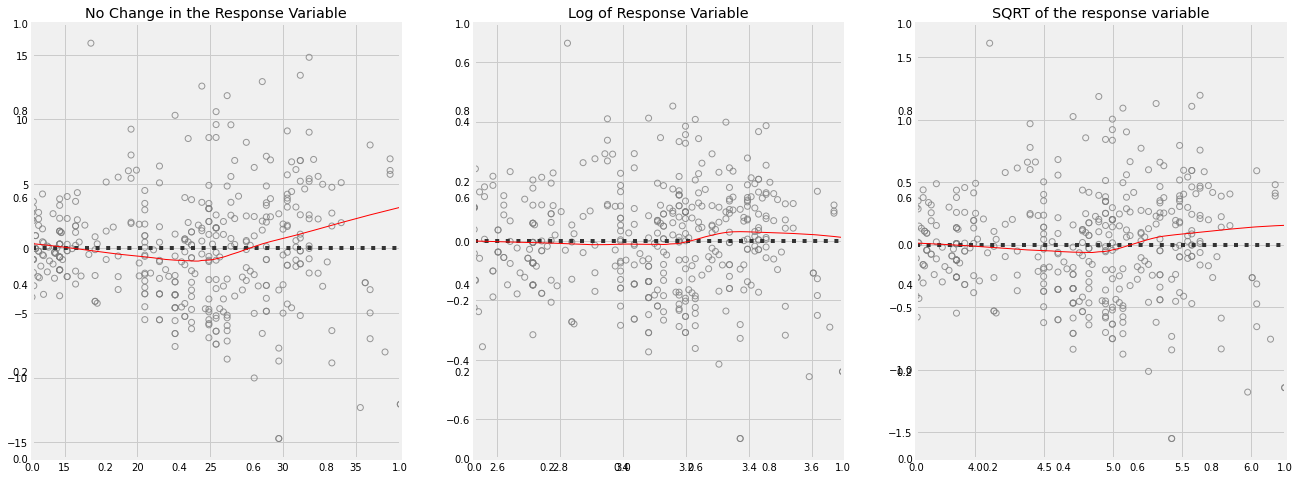

In [43]:
fig, ax = plt.subplots(1,3,figsize=(20,8))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)
sns.residplot(x=mpg_pred,y=auto_model.resid,lowess=True,line_kws={'color':'r','lw':1},scatter_kws={'facecolor':'None','edgecolor':'grey'},ax=ax1)
sns.residplot(x=lmpg_pred,y=auto_model_log.resid,lowess=True,line_kws={'color':'r','lw':1},scatter_kws={'facecolor':'None','edgecolor':'grey'},ax=ax2)
sns.residplot(x=sqmpg_pred,y=auto_model_sqrt.resid,lowess=True,line_kws={'color':'r','lw':1},scatter_kws={'facecolor':'None','edgecolor':'grey'},ax=ax3)
ax1.set_title('No Change in the Response Variable')
ax2.set_title('Log of Response Variable')
ax3.set_title('SQRT of the response variable')
plt.show()

**Observation:**
- One possible solution  for this problem is to transform the response variable $Y$ using a concave function such as $\log Y \text{ or }\sqrt Y$. This results in greater amount of shrinkage of the larger responses, leading to a reduction in herteroscedasticity.
- Here we can see that the $\log Y$ is better than the $\sqrt Y$.
- The residuals now appear to have a contant variance, though there is a slight evidence of non linear relationship.

**Weighted Least Squares**

- The $i$th response could be an average of $n_i$ raw observations.
- If each of these raw observations are uncorrelated with variance $\sigma^2$, then their average has a variance of $\sigma_i^2 = \frac{\sigma^2}{n_i}$
- In this case the simple remedy is to fit our model by weighted least squares, with weights proportional to the inverse variations,i.e, $w_i = n_i$

**4.Collinearity**

- Collinearity refers to the situation in which two or more predictor variables are closely related to one another.
- Example, in the credit data set,two predictors limit and age appear to have no obvious relationship
- On the other hand limt and rating are highly correlated with one another and is said to be collinear.

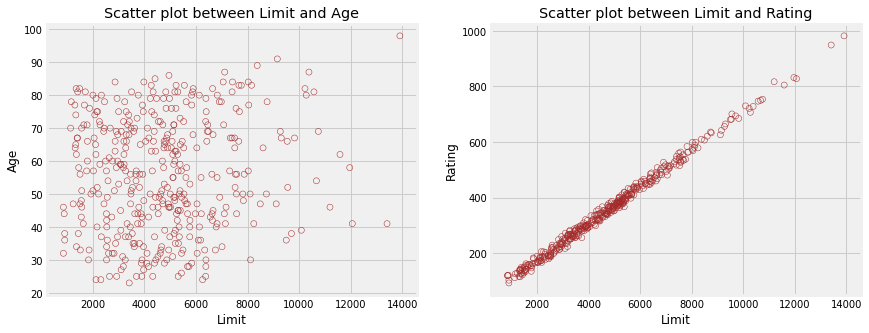

In [44]:
fig, ax = plt.subplots(1,2,figsize=(13,5))
ax[0].scatter(credit_data['Limit'],credit_data['Age'],facecolor='None',edgecolor='brown')
ax[0].set_title('Scatter plot between Limit and Age')
ax[0].set_xlabel('Limit')
ax[1].set_xlabel('Limit')
ax[0].set_ylabel('Age')
ax[1].set_ylabel('Rating')
ax[1].scatter(credit_data['Limit'],credit_data['Rating'],facecolor='None',edgecolor='brown')
ax[1].set_title('Scatter plot between Limit and Rating')
plt.show()

- The presence of collinearity in predictors can pose problem in regression context, since it can be difficult to seperate out the individual effects of collinear predictors from the response variable.

**Detecting MultiCollinearity**
- One way of checking for multicollinearity is by calculating VIF(Variance Inflation Facor).
- The VIF is the ratio of the variance of $\hat\beta_j$ when fitting the full model divided by the variance of $\hat\beta_j$ if fit on its own.
- The smallest possible value for VIF is 1, which indicates the complete absence of collinearity.
- Typically in practise, there is a small collinearity among the predictors.
- A VIF value that exceeds 5 or 10 indicates a problematic amount of collinearity.
- The VIF value for each variable can be calculated by,

  $\text{VIF}(\hat\beta_j) = \frac{1}{1-R^2_{X_j|X_{-j}}}$

  where $R^2_{x_j|x_{-j}}$ is the $R^2$ from a regression of $X_j$ on to all other predictors.If $R^2_{x_j|x_{-j}}$, is close to one, then collinearity is present, and so VIF will be large.

**Calculation of VIF**

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [46]:
X = credit_data[['Age','Rating','Limit']]

In [47]:
pd.DataFrame([vif(X.values,i) for i in range(X.shape[1])],index=X.columns,columns=['VIF'])

,VIF
Age,7.377927
Rating,612.449343
Limit,540.136040


**Observation:**
- Here we can observe huge values of VIF for both Rating and Limit and this tell us both the predictors are highly correlated.

In [48]:
X.corr()

,Age,Rating,Limit
Age,1.000000,0.103165,0.100888
Rating,0.103165,1.000000,0.996880
Limit,0.100888,0.996880,1.000000


**Observation**
- We can observe that highly correlated predictors are usuallu collinear.

In [49]:
X = credit_data[['Age','Limit']]

In [50]:
pd.DataFrame([vif(X.values,i) for i in range(X.shape[1])],index=X.columns, columns=['VIF'])

,VIF
Age,4.172858
Limit,4.172858


In [51]:
X = credit_data[['Age','Rating']]

In [52]:
pd.DataFrame([vif(X.values,i) for i in range(X.shape[1])],index=X.columns, columns=['VIF'])

,VIF
Age,4.731519
Rating,4.731519


**Observation:**
- After dropping the Either Rating or Limit, it is observed that the vif values are the lowest when we drop the Rating predictor.
- Hence it is better to model a regressor without rating.
- The Second solution is to combine both the predictors into a single predictor.
- For Example, we can combine both rating and limit predictor to a single predictor such as credit worthiness or something like that.

**Common Test to be Used on Residuals:**

**Checking the Normality of the Residuals**

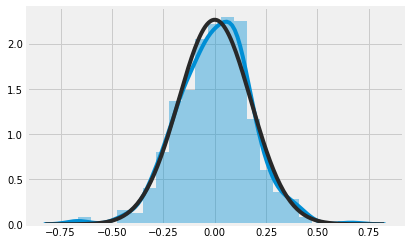

In [53]:
from scipy.stats import norm
norm.fit(auto_model_log.resid)
sns.distplot(auto_model_log.resid,fit=norm)
plt.show()

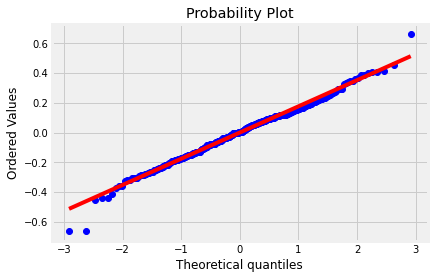

In [54]:
import scipy.stats as stats

stats.probplot(auto_model_log.resid,plot=plt)
plt.show()

**Observations:**
- From both the plots, we can visually confirm that the residual plots are almost normal.


**Test of Normality (Jarqberra-Test, Shapiro-Test)**

In [55]:
from statsmodels.compat import lzip
name = [r'p-statistic',r'p-value']

In [56]:
jb_test = stats.jarque_bera(auto_model_log.resid)

In [57]:
lzip(name,jb_test)

[('p-statistic', 13.71398911183596), ('p-value', 0.0010520711268079408)]

In [58]:
shap_test = stats.shapiro(auto_model_log.resid)

In [59]:
lzip(name,shap_test)

[('p-statistic', 0.9915388822555542), ('p-value', 0.024583572521805763)]

- Both the Jarque bera test and Shapiro test confirms what we tested through visualization.

**Homoscedasticity in Error Terms or Residuals**

In [60]:
import statsmodels.stats.api  as sms
import statsmodels.api as sm

In [61]:
Xc = sm.add_constant(auto_data[['horsepower','horsepower2']])

In [62]:
lzip(['F-Statistic','p-value'],sms.het_goldfeldquandt(y=auto_model_log.resid,x=Xc))

[('F-Statistic', 1.1949387575361174), ('p-value', 0.10847636105772503)]

**Observation:**
- In theory, the p-value should be less than 0.05, However in practical world, this is not achievable.
- This values is pretty decent for this model.

**Auto Correlation or Collinearity:**

In [63]:
import statsmodels.tsa.api as smt

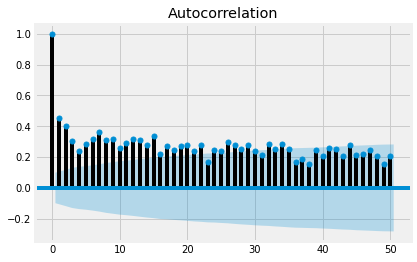

In [64]:
acf = smt.graphics.plot_acf(auto_model_log.resid,lags=50)
acf.show()

In [65]:
print(auto_model_log.summary())

                            OLS Regression Results                            
Dep. Variable:                   lmpg   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     532.2
Date:                Sun, 21 Jun 2020   Prob (F-statistic):          4.54e-112
Time:                        04:15:48   Log-Likelihood:                 125.48
No. Observations:                 392   AIC:                            -245.0
Df Residuals:                     389   BIC:                            -233.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       4.4022      0.073     60.639      

**Observation:**
- The Durbin Watson test is 1.092, which indicates that might be collinearity issues.
- The value when close to 2, means there is no auto correlation

**Non Linearity of the Data:**

**Rainbow test for Linearity of Data**

In [66]:
lzip(['F-statistic','p-value'],sm.stats.diagnostic.linear_rainbow(res=auto_model_log))

[('F-statistic', 1.6348266469528543), ('p-value', 0.00033252555581859446)]

- THe p values is below significance level and hence we accept the null hypothesis, that the data is linear.

**Comparison of Linear Regression with $K$-Nearest Neighbours**

***Parametric Methods***
- Linear Regression is an example for parametric approach because it assumes a linear functional form for $f(X)$
- Parametric methods have several advantages.

**Advantages**
- They are easy to fit since they have a small number of coefficient to fit.
- Test of statistical significance can be performed easily.

**Disadvantages:**
- They make strong assumptions about the form of $f(X)$
- If specified form is far from truth and prediction accuracy is our goal, then this model would perform poorly.

***Non Parametric Methods***
- Non parametric methods do not explicitly assume the a parametric form of $f(X)$, and there by providing an alternative and more flexible approach for performing regression.
- We will consider one of the most commonly used non parametric methods, $K$-Nearest Neighbors regression (KNN Regression)

***Note:***
- The parametric approach will outperform a non parametric approach, if the parametric form that has been selected is closer to the true form of $f$.

***Diagnostic Plots for Residuals:***
- These are usually classified into 4 types.
  - Residual vs Fitted
  - QQ plot or Probplot
  - Scale Location plot
  - Residual vs Leverage plot

**Residual vs Fitted plot**

- This graph shows if there are any non-linear patterns in residuals, and thus in data as well.
- One of the mathematical assumptions in building a linear model (OLS) is that the data can be fit by a line.
- If this assumption holds and our data can be fit by a linear model, then we should see a relativly flat line when looking at residuals vs fitted.

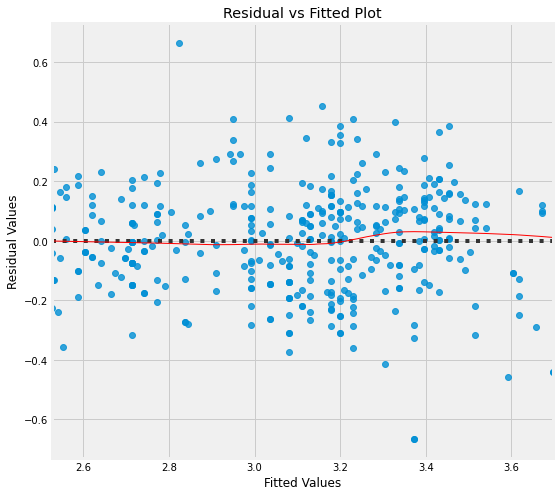

In [67]:
# model fitted values
model_fitted_y = auto_model_log.fittedvalues
# model residual values
model_residuals = auto_model_log.resid
# plot
plt.figure(figsize=(8,8))
sns.residplot(x=model_fitted_y,y=model_residuals,lowess=True,line_kws={'color':'r','lw':1})
plt.title('Residual vs Fitted Plot')
plt.xlabel('Fitted Values')
plt.ylabel('Residual Values')
plt.show()

**QQ plot or Probplot**

- This plot show if the residuals are normally distributed.
- A Normal QQ plot has all the points lying close to the red line

In [68]:
import scipy.stats as stats

In [69]:
# Standardized Residuals
model_norm_residuals = auto_model_log.get_influence().resid_studentized_internal

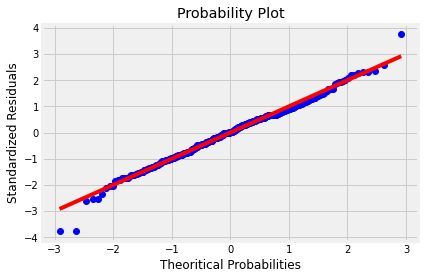

In [70]:
stats.probplot(model_norm_residuals,plot=plt)
plt.xlabel('Theoritical Probabilities')
plt.ylabel('Standardized Residuals')
plt.show()

**Observation:**
- Looking at this plot, there are a few points that are lying away from the red line.
- This is indicative of errors not being normally distributed.

**Scale-Location plot**

- This plot is used to check if the residuals suffer from non-constant variance, aka heteroscedasticity.

In [71]:
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

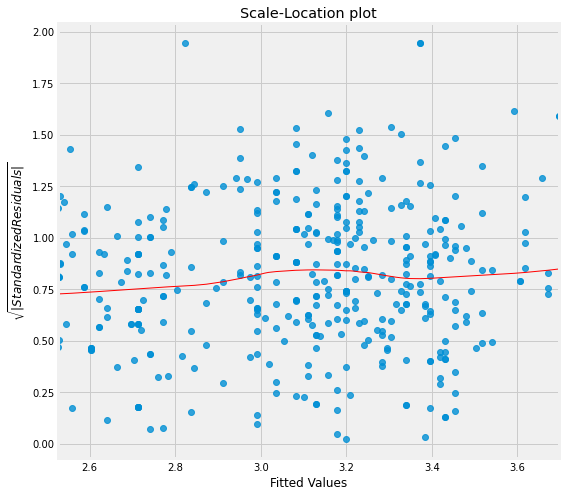

In [72]:
plt.figure(figsize=(8,8))
sns.regplot(x=model_fitted_y,y=model_norm_residuals_abs_sqrt,lowess=True,line_kws={'color':'r','lw':1})
plt.xlabel('Fitted Values')
plt.ylabel(r'$\sqrt{|Standardized Residuals|}$')
plt.title('Scale-Location plot')
plt.show()

**Observation:**
- The variance of the residuals are mostly constant.

**Residuals vs Leverage**

- Unlike outliers, which usually has large $y$ values, leverage points have extreme $x$ values.
- This may not be seen as bad at face value, but it can have damaging effects on the model because the $\beta$ coefficients are very sensitive to leverage points.
- The purpose of the Residual vs Leverage plots is to identify these problematic observations.

In [73]:
# Leverage Points
model_leverage = auto_model_log.get_influence().hat_matrix_diag
# Cooks Distance
model_cooks = auto_model_log.get_influence().cooks_distance[0]

In [74]:
#Helper function for plotting cooks distance line
def graph(formula, x_range, label=None):
  x = x_range
  y = formula(x)
  plt.plot(x, y,label=label,lw=1,ls='--',color='red')

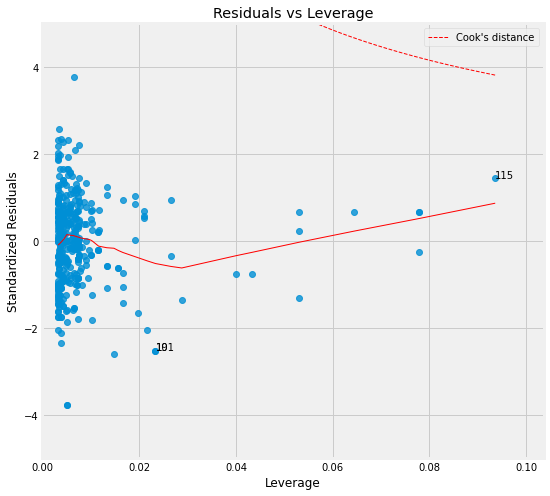

In [75]:
plt.figure(figsize=(8,8))
sns.regplot(x=model_leverage,y=model_norm_residuals,scatter=True,line_kws={'color':'r','lw':1},lowess=True,ci=False)
plt.title('Residuals vs Leverage')
plt.xlabel('Leverage')
plt.ylabel('Standardized Residuals')
plt.xlim(0,max(model_leverage)+0.01)
plt.ylim(-5,5)

# Annotations
leverage_top_3 = np.flip(np.argsort(model_cooks,0))[:3]
for i in leverage_top_3:
  plt.annotate(i,xy=(model_leverage[i],model_norm_residuals[i]))

# Code for Cooks Distance
p = len(auto_model_log.params) # Number of model parameters
graph(lambda x:np.sqrt((0.5*p*(1-x))/x),np.linspace(0.001,max(model_leverage),50),'Cook\'s distance')
graph(lambda x:np.sqrt((1*p*(1-x))/x),np.linspace(0.001,max(model_leverage),50))
plt.legend(loc='best')
plt.show()


**Observation:**
- We only need to find leverage points that have a distance greater than 0.5.
- In this plot we dont have any points that have distance grate than 0.5.
- In practice, there may be cases where we may want to remove points more than 0.5.
- Arguably, if the observation with more distance when removed, the model would perform better.